#  训练神经网络 -- 使用微分求导

### 导入鸢尾花数据集

In [4]:
import sys, os
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split

iris = datasets.load_iris()

In [5]:
X = iris.data
y = iris.target

print('输入数据维度： ',   X.shape)
print('标记数据维度： ',y.shape)


输入数据维度：  (150, 4)
标记数据维度：  (150,)


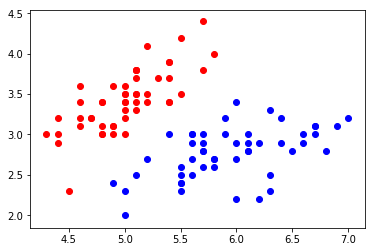

In [6]:
# 打印图像
plt.scatter(X[y==0,0], X[y==0,1], color="red")
plt.scatter(X[y==1,0], X[y==1,1], color="blue")
plt.show()

In [7]:
# 对数据进行分割， 分成测试和训练数据 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 4)
(112,)
(38, 4)
(38,)


### 损失函数

神经网络的学习中所用的指标称为 **损失函数** 。
一般用均方误差和交叉熵误差。




####  均方误差公式
  ${1/2}\sum_{i=0}^{n}{(y_i-t_i)}^2$

In [8]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t) ** 2)

# 2 为正确解
t = [0, 0, 1, 0, 0,0, 0, 0, 0, 0]

# 2 的概率最高
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
e1 = mean_squared_error(np.array(y), np.array(t))

# 7 的概率最高
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
e2 = mean_squared_error(np.array(y), np.array(t))

print(e1)
print(e2)


0.09750000000000003
0.5975



#### 交叉熵误差公式
  -$\sum_{i=0}^{n}{t_i log y_i}$  
  
  
因为t 只有一个标签为1， 剩余都为0， 所以交叉熵误差的值是由正确解标签所对应的输出结果决定的。 

In [9]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))



# 2 为正确解
t = [0, 0, 1, 0, 0,0, 0, 0, 0, 0]

# 2 的概率最高
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
e1 = cross_entropy_error(np.array(y), np.array(t))

# 7 的概率最高
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
e2 = cross_entropy_error(np.array(y), np.array(t))

print(e1)
print(e2)



0.510825457099338
2.302584092994546


###  批量学习

随机选择一组数据进行训练

In [10]:
train_size = X_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = X_train[batch_mask]
y_batch = y_train[batch_mask]
print('batch_mask: ', batch_mask)
print('x_batch: ', x_batch)
print('y_batch: ', y_batch)

batch_mask:  [98 31 88 47 46 16 23 97 39  6]
x_batch:  [[5.4 3.4 1.7 0.2]
 [6.4 2.8 5.6 2.1]
 [4.4 3.2 1.3 0.2]
 [5.7 3.  4.2 1.2]
 [5.1 3.7 1.5 0.4]
 [6.  2.9 4.5 1.5]
 [5.7 4.4 1.5 0.4]
 [4.8 3.4 1.9 0.2]
 [6.7 3.3 5.7 2.5]
 [5.4 3.7 1.5 0.2]]
y_batch:  [0 2 0 1 0 1 0 0 2 0]


In [28]:
# 交叉熵函数也进行改进
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 监督数据是one-hot-vector的情况下，转换为正确解标签的索引
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

### 利用微分求导数 (拉格朗日中值定理)

In [29]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h))/ (2*h)

$y = 0.01 x^2 + 0.1 x$

求这个函数在某一个点的导数

In [30]:
def function_1(x):
    return 0.01 * x**2 + 0.1 *x
 

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)



x=5  导数：  0.1999999999990898
x=10 导数：  0.2999999999986347


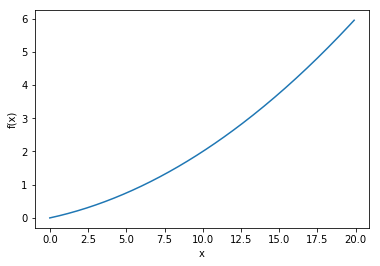

In [31]:
# 求在 x=5  x=10 出的导数
print('x=5  导数： ', numerical_diff(function_1, 5))
print('x=10 导数： ', numerical_diff(function_1, 10))

plt.xlabel("x")
plt.ylabel("f(x)")

plt.plot(x, y)
plt.show()




### 偏导数

求下面函数的偏导数

$f(x_0,x_1) = x_0^2 + x_1^2 $

In [32]:
def function_2(x):
    return x[0]**2 + x[1]** 2
    # return np.sum(x**2)

$x_0 =3, x_1= 4$, 求$x_0$ 的偏导数

In [33]:
def function_tmp1(x0):
    return x0*x0 + 4.0 **2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

$x_0 =3, x_1= 4$, 求$x_1$ 的偏导数

In [34]:
def function_tmp2(x1):
    return 3.0**2.0  + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

###  求梯度 


In [35]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        
    return grad

print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))


[6. 8.]
[0. 4.]
[6. 0.]


### 用梯度下降法求最小值


$f(x_0,x_1) = x_0^2 + x_1^2 $

In [36]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

[2.85449539e-05 2.85449539e-05]


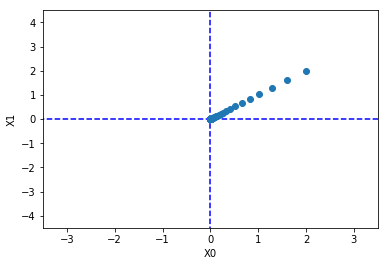

In [37]:
init_x = np.array([2.0, 2.0])
x, x_history =gradient_descent(function_2, init_x= init_x, lr=0.1, step_num=50)
print(x)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [38]:
# 用于分类的激活函数
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 溢出对策
    return np.exp(x) / np.sum(np.exp(x))

In [39]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    print('x ', x)
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 还原值
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

### 简单的神经网络求梯度

In [44]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()
print(net.W)

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 1.39071302  0.17653912 -0.59411761]
 [ 1.22157931  1.23908751 -0.76739456]]
[[ 0.38934656  0.19089487 -0.58024143]
 [ 0.58401984  0.28634231 -0.87036215]]


In [45]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [46]:



class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:输入数据, t:监督数据
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=0)
        t = np.argmax(t, axis=0)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:输入数据, t:监督数据
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [51]:
network = TwoLayerNet(input_size=X_train.shape[1], hidden_size=50, output_size=3)

iters_num = 1000  # 适当设定循环的次数
train_size = X_train.shape[0]
batch_size = 10
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
%%time 
for i in range(iters_num):
#     print('----------------- ', i)
    batch_mask = np.random.choice(train_size, batch_size)
    X_batch = X_train[batch_mask]
    y_batch = y_train[batch_mask]
    
    # 计算梯度
    grad = network.numerical_gradient(X_batch, y_batch)
#     grad = network.gradient(X_batch, y_batch)

    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(X_batch, y_batch)
    train_loss_list.append(loss)
    print(i, loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(X_train, y_train)
        test_acc = network.accuracy(X_test, y_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


0 0.9703602948186608
train acc, test acc | 0.0, 0.02631578947368421
1 1.0807333034091386
2 1.0658830829942778
3 1.0541067206054429
4 1.088677387083171
5 1.0980386366236943
6 1.0899008582070115
7 0.8700313496765236
8 1.0423214604640234
9 1.0612289340615164
10 1.0566923342606027
11 1.0955631559428338
12 1.0177414439306949
13 1.0585515939383157
14 1.0770138805382008
15 1.0798726670675294
16 0.9974067117748451
17 1.0963106748268174
18 1.0728037580888883
19 1.0774141467986882
20 1.057954622653437
21 1.0020134642740621
22 0.9794993942438129
23 1.017640498455316
24 1.0503176915646644
25 1.0691757113389968
26 0.9089786687796794
27 1.0921820997397376
28 0.9413242789296359
29 1.1130169343435519
30 0.5689004119036307
31 1.1031779508007484
32 1.0909975036878938
33 1.0787632794394728
34 1.0189303782740873
35 1.0668924062831349
36 1.0632612746771815
37 0.9580270028542334
38 0.9728410919951118
39 1.0402675630245883
40 1.0931458255583577
41 1.0948703500313963
42 0.990297943843864
43 1.0520491767896432

360 0.37528352053066444
361 0.30778803779038855
362 0.2892948100853102
363 0.2787425181992996
364 0.24928358368464373
365 0.2806740082511026
366 0.37941900194352673
367 0.23282544123750756
368 0.35475740944918177
369 0.23677488976426359
370 0.3217610389022482
371 0.3554021532260925
372 0.12620722613457766
373 0.129152758270514
374 0.372556527066113
375 0.31934229986520213
376 0.3190645627596008
377 0.291576931639244
378 0.4005465580123837
379 0.2835402601330052
380 0.4320949416619026
381 0.256153795489209
382 0.3533679911723674
383 0.4377426522483109
384 0.3468772378825338
385 0.2430938977569752
386 0.28323325323137216
387 0.315817083131203
388 0.24622226277968573
389 0.40432560691164554
390 0.3221546642825116
391 0.265740663590624
392 0.39678100507987246
393 0.31156426256188147
394 0.24762895366627627
395 0.23208512715944432
396 0.3561959554071525
397 0.34541260564938797
398 0.2534571912865066
399 0.19919704114147346
400 0.24497367906493298
401 0.201154372608302
402 0.4107033510641148

707 0.12973636399971672
708 0.26333032163458203
709 0.14792127307230016
710 0.16419624900571336
711 0.21851576821684365
712 0.1833292944397919
713 0.0948543487353819
714 0.11678842834200202
715 0.13629622416616405
716 0.12254333165282374
717 0.09162456413274005
718 0.11799876875415152
719 0.2381901457344126
720 0.09117514520890584
721 0.21382986982702126
722 0.1371029964563586
723 0.15094456134663267
724 0.2094305979574682
725 0.2600450983868817
726 0.12899543760851545
727 0.07973613906262375
728 0.14972706471922345
729 0.0802513922555269
730 0.17153706897333637
731 0.1916510757277197
732 0.19172350664031584
733 0.1550440119473317
734 0.14639601357410736
735 0.06520289538205268
736 0.17933001483043703
737 0.16297016367182257
738 0.23532008090685283
739 0.15078186099518026
740 0.15775543356693747
741 0.25666381734722427
742 0.16249760713454267
743 0.19011369628878136
744 0.19345028311859408
745 0.14236578139804176
746 0.18821030596777655
747 0.15205173447873205
748 0.11469180634873807
7

In [53]:
print( len(train_loss_list))




1000


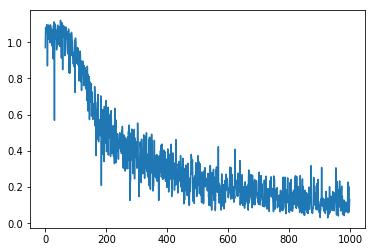

In [54]:
# 绘制图形
import matplotlib.pyplot as plt
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_loss_list))
plt.plot(x, train_loss_list, label='train acc')

plt.show()

In [55]:
predict = network.predict(X_test)

accuracy_cnt = 0
for i in range(len(predict)):
    if np.argmax(predict[i]) == y_test[i]:
        accuracy_cnt += 1

print(accuracy_cnt/ len(y_test))

1.0
